Upon data preparation and the formulation of batch functions, we proceed to deploy Deep Learning for 3D segmentation through the adoption of a straightforward 3D U-net architecture. It is imperative to note that images are anticipated to manifest as 128x128x128x3 numpy arrays, where the '3' signifies the three channels attributed to test_image_flair, test_image_t1ce, and test_image_t2. Conversely, masks are envisaged as 128x128x128x3 numpy arrays, where '4' designates the four labels.

In [2]:
import os
import numpy as np
from Batch_functions import imageLoader
#import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random

Initially, we specify the directory containing the image and mask files. Subsequently, we visualize the data.

In [47]:
train_img_dir = 'd:/BraTS2020/input_data_3channels/images/'
train_mask_dir = 'd:/BraTS2020/input_data_3channels/masks/'

val_img_dir = 'd:/BraTS2020/validation_data_3channels/images/'


train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)

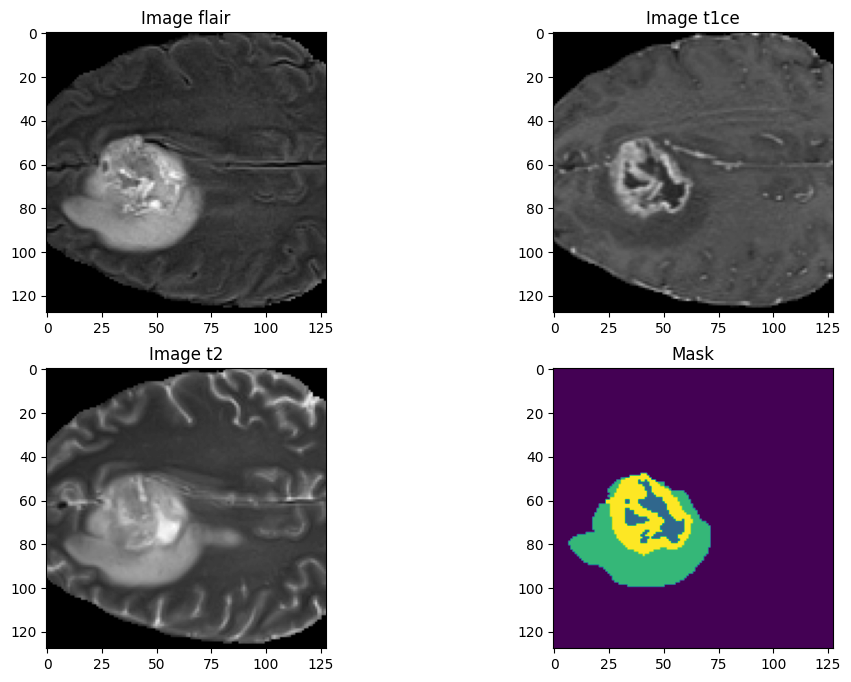

In [51]:
num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+train_img_list[img_num])
test_mask = np.load(train_mask_dir+train_mask_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

Now that we check the correct visualization of the data, let's define train and validation. 